In [6]:
# Persiapan data
import pandas as pd  # Impor library pandas untuk manipulasi data.
import numpy as np   # Impor library numpy untuk operasi numerik.
import matplotlib.pyplot as plt  # Impor library matplotlib untuk visualisasi data.
from sklearn.cluster import KMeans  # Impor fungsi KMeans dari library scikit-learn untuk pengelompokan data.

df = pd.read_csv('../data/Iris.csv')  # Membaca file 'Iris.csv' dan menyimpannya dalam dataframe 'df'.

df.head()  # Menampilkan lima baris pertama dari dataframe 'df'.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]  # Mengambil kolom kedua hingga kolom terakhir dari dataframe 'df' sebagai fitur dan menyimpannya dalam 'X'.
y = df.iloc[:, -1]  # Mengambil kolom terakhir dari dataframe 'df' sebagai target (label) dan menyimpannya dalam 'y'.


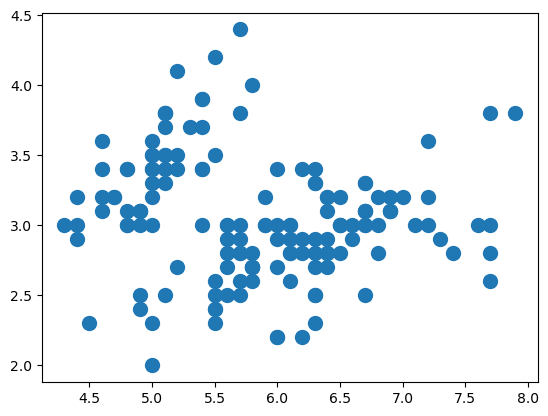

In [8]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [10]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans  # Impor fungsi KMeans dari library scikit-learn.

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)  # Membuat objek KMeans dengan 2 kluster.

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)  # Melatih model KMeans dan melakukan prediksi pada data fitur 'X'.


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


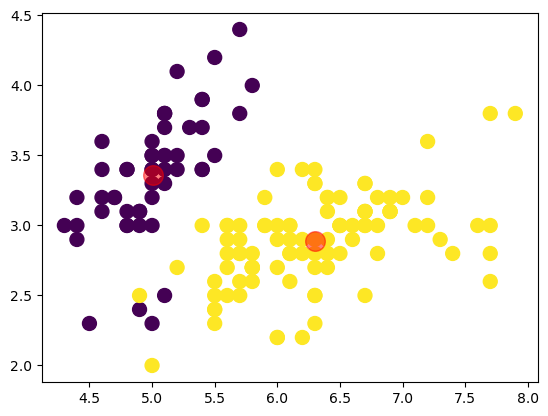

In [11]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [12]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

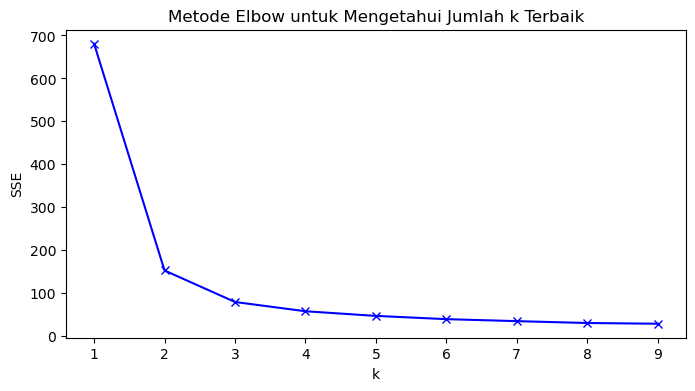

In [13]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1, 10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)  # Membuat model KMeans dengan jumlah kluster k.
    kmeanModel.fit(X)  # Melatih model menggunakan data fitur 'X'.
    sse.append(kmeanModel.inertia_)  # Menyimpan nilai SSE ke dalam list sse.

# Plotting the distortions
plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")  # Membuat plot nilai SSE terhadap jumlah kluster k.
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()  # Menampilkan grafik untuk metode Elbow.


In [14]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244
k=2; SSE=152.36870647733906
k=3; SSE=78.94084142614602
k=4; SSE=57.345409315718165
k=5; SSE=46.535582051282056
k=6; SSE=38.93873974358975
k=7; SSE=34.31116758986839
k=8; SSE=29.955568877177573
k=9; SSE=28.293800189466936
